# Advanced Tutorial on Jacobians in Robot Manipulators

In this tutorial, we will delve deep into the concept of the Jacobian in robotic manipulators, explore its significance, and visualize it using matplotlib.


In [7]:
!pip install roboticstoolbox-python

import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt


## Background

The Jacobian matrix plays a crucial role in robot kinematics. It connects the velocity of the robot's joints to the linear and angular velocity of the end-effector, and is crucial for tasks such as motion planning and control.

## Robot Definition

Let's define a simple 2-link (2R) planar robot for our Jacobian exploration.


In [45]:
# Define a 2R robot using standard DH parameters
a1, a2 = 1.5, 1
robot = rtb.DHRobot([
    rtb.RevoluteDH(a=a1),   # First link of length 1
    rtb.RevoluteDH(a=a2)    # Second link of length 1
], name="2R_robot")


## Understanding the Jacobian

The Jacobian matrix provides a relationship between joint velocities and end-effector velocities. It can be visualized as a transformation that converts a change in joint space to a change in Cartesian space.


[[-2.06066017e+00 -1.00000000e+00]
 [ 1.06066017e+00  1.79380389e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00]]


<ipython-input-46-dc45a8780ebc>:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Magnitude')


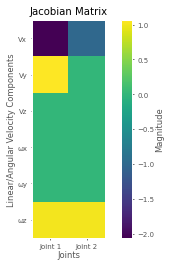

In [46]:
# Compute Jacobian for a sample joint configuration
q = [np.pi/4, np.pi/4]
J = robot.jacob0(q)
print(J)
# Visualize Jacobian using a heatmap
plt.imshow(J, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Magnitude')
plt.title('Jacobian Matrix')
plt.xlabel('Joints')
plt.ylabel('Linear/Angular Velocity Components')
plt.xticks(ticks=range(2), labels=[f'Joint {i+1}' for i in range(2)])
plt.yticks(ticks=range(6), labels=['Vx', 'Vy', 'Vz', 'ωx', 'ωy', 'ωz'])
plt.grid(False)
plt.show()


## Physical Interpretation

Each column of the Jacobian corresponds to a joint of the robot. For a revolute joint, the first three rows of its column represent the linear velocity resulting from the rotation of that joint, while the last three rows represent the angular velocity.

## Jacobian Singularities

A singularity occurs when the determinant of the Jacobian is zero. In these configurations, the robot loses its ability to move in certain directions. Let's visualize the determinant of the Jacobian across the robot's workspace.


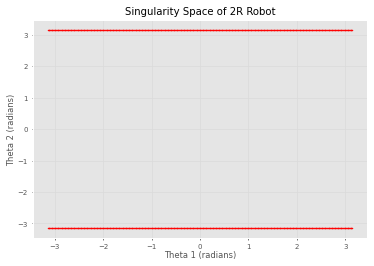

In [51]:
import matplotlib.pyplot as plt

theta1_vals = np.linspace(-np.pi, np.pi, 400)
theta2_vals = np.linspace(-np.pi, np.pi, 400)

singular_points = []

def jacobian(q):
    """Compute the Jacobian for a 2R robot."""
    J = np.array([
        [-a1 * np.sin(q[0]) - a2 * np.sin(q[0] + q[1]), -a2 * np.sin(q[0] + q[1])],
        [a1 * np.cos(q[0]) + a2 * np.cos(q[0] + q[1]), a2 * np.cos(q[0] + q[1])]
    ])
    return J


for theta1 in theta1_vals:
    for theta2 in theta2_vals:
        J = jacobian([theta1, theta2])
        if abs(np.linalg.det(J)) < 1e-3:  # Near-zero determinant indicates a singularity
            singular_points.append((theta1, theta2))

# Extracting the singular points
theta1_sing, theta2_sing = zip(*singular_points)

# Plot
plt.scatter(theta1_sing, theta2_sing, s=1, color="red")
plt.title("Singularity Space of 2R Robot")
plt.xlabel("Theta 1 (radians)")
plt.ylabel("Theta 2 (radians)")
plt.grid(True)
plt.show()


## Conclusion

The Jacobian matrix provides valuable insights into the motion of robotic manipulators. Understanding its properties and singularities is essential for effective robot control and motion planning.


# Manipulability in Robot Manipulators

## Introduction

Manipulability is a measure that describes how well a robot can move its end-effector in different directions at a given joint configuration. The concept was introduced by Yoshihiko Nakamura to express the isotropy of the robot's motion capabilities.

## Mathematical Definition

For a given joint velocity, the end-effector velocity is given by:
$$ v = J \cdot \dot{q} $$

Where:
- \( v \) is the end-effector velocity.
- \( J \) is the Jacobian matrix of the robot.
- \( \dot{q} \) is the joint velocity.

The manipulability measure, \( w \), is defined as the square root of the determinant of the product of the Jacobian matrix and its transpose:
$$ w = \sqrt{\text{det}(J \cdot J^T)} $$

The manipulability measure provides insight into the robot's capability to move its end-effector. When \( w \) is large, the robot can move effectively in many directions. When \( w \) is close to zero, the robot is close to a singularity and its motion capabilities are limited.


In [52]:
import numpy as np

def compute_manipulability(J):
    """Compute the manipulability for a given Jacobian matrix."""
    w = np.sqrt(np.linalg.det(J @ J.T))
    return w


In [53]:
q = [np.pi/2, np.pi/2]
J = robot.jacob0(q)
J_reduced = J[:2, :2]
m = compute_manipulability(J_reduced)
print(m)

1.5000000000000002
